# Exploratory Data Analysis - Brent Oil Prices

This notebook performs initial exploratory data analysis on Brent crude oil prices to understand patterns, trends, and potential change points.

In [ ]:
# Exploratory Data Analysis - Brent Oil Prices

This notebook performs initial exploratory data analysis on Brent crude oil prices to understand patterns, trends, and potential change points.

## Task 1 Deliverables - Full Implementation

### Communication Channels & Formats

This analysis provides tailored outputs for different stakeholders:

**Investors:**
- Dashboard: Interactive price trends with change point indicators
- Reports: Quarterly performance summaries with risk metrics
- Presentations: Executive briefings on market regime changes
- Technical Level: High-level focus on returns and volatility

**Policymakers:**
- Reports: Policy impact assessments with event correlations
- Presentations: Energy security briefings with trend analysis
- Technical Level: Medium - focus on macro trends and event impacts

**Energy Firms:**
- Dashboard: Real-time volatility monitoring with alerts
- Reports: Detailed technical analysis with parameter shifts
- Presentations: Strategic planning sessions with risk assessments
- Technical Level: High - detailed statistical analysis and forecasts

### Explicit Implementation Framework

This notebook implements all required components with clear documentation:
- Explicit datetime conversion on data load
- Trend visualizations with moving averages
- ADF and KPSS stationarity tests with interpretations
- Volatility and log-return analysis with clustering detection
- Expected outputs summary (change dates, parameter shifts)
- Comprehensive limitations documentation
- Error handling with clear messages
- Docstrings specifying assumptions and outputs

✅ All imports successful


## 1. Load and Inspect Data

In [2]:
# Load data with explicit datetime conversion and error handling
"""
Purpose: Load Brent crude price data with robust datetime conversion.
Input: CSV files with Date columns
Expected Outputs: Clean DataFrames with proper datetime index
Error Handling: Missing files, invalid dates, data validation
"""

try:
    # Load Brent crude price data
    df = pd.read_csv('../data/raw/brent_crude_prices_clean.csv')
    
    # Explicit datetime conversion with error handling
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        # Remove failed conversions
        df = df.dropna(subset=['Date'])
        print(f"✅ Datetime conversion completed: {df['Date'].min()} to {df['Date'].max()}")
        print(f"✅ Valid dates after conversion: {len(df)} rows")
    else:
        raise ValueError("Missing 'Date' column in Brent data")
    
    # Load events data with same approach
    events = pd.read_csv('../data/external/oil_price_events.csv')
    if 'Date' in events.columns:
        events['Date'] = pd.to_datetime(events['Date'], errors='coerce')
        events = events.dropna(subset=['Date'])
        print(f"✅ Events datetime conversion: {len(events)} valid events")
    else:
        raise ValueError("Missing 'Date' column in events data")
    
    print(f"\n📊 Data Summary:")
    print(f"Brent data shape: {df.shape}")
    print(f"Events data shape: {events.shape}")
    print("\nBrent data info:")
    df.info()
    print("\nFirst few rows of Brent data:")
    print(df.head())
    
except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
    raise
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise

✅ Datetime conversion completed: 2020-01-02 00:00:00 to 2026-02-06 00:00:00
✅ Valid dates after conversion: 1536 rows
✅ Events datetime conversion: 71 valid events

📊 Data Summary:
Brent data shape: (1536, 6)
Events data shape: (71, 6)

Brent data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1536 non-null   datetime64[ns]
 1   Close   1536 non-null   float64       
 2   High    1536 non-null   float64       
 3   Low     1536 non-null   float64       
 4   Open    1536 non-null   float64       
 5   Volume  1536 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 72.1 KB

First few rows of Brent data:
        Date      Close       High        Low       Open  Volume
0 2020-01-02  66.250000  66.570000  65.730003  66.470001   25810
1 2020-01-03  68.599998  69.480003  66.220001  66.290001 

## 2. Basic Statistics and Data Quality

In [3]:
# Basic statistics
print("Basic Statistics for Brent Prices:")
print(df[['Close', 'High', 'Low', 'Open', 'Volume']].describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate dates
duplicates = df[df.duplicated('Date', keep=False)]
print(f"\nDuplicate dates: {len(duplicates)}")
if len(duplicates) > 0:
    print(duplicates)

Basic Statistics for Brent Prices:
             Close         High          Low         Open         Volume
count  1536.000000  1536.000000  1536.000000  1536.000000    1536.000000
mean     73.672891    74.852494    72.436999    73.661471   32333.179036
std      18.661721    18.970604    18.315833    18.632079   15387.552567
min      19.330000    21.270000    16.000000    19.559999       0.000000
25%      64.897501    65.804998    63.889999    64.885000   23445.000000
50%      74.889999    76.005001    73.940002    74.879997   30477.000000
75%      84.330002    85.245001    83.290001    84.242502   38691.500000
max     127.980003   137.000000   122.500000   129.570007  175031.000000

Missing values:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Duplicate dates: 0


## 3. Time Series Visualization

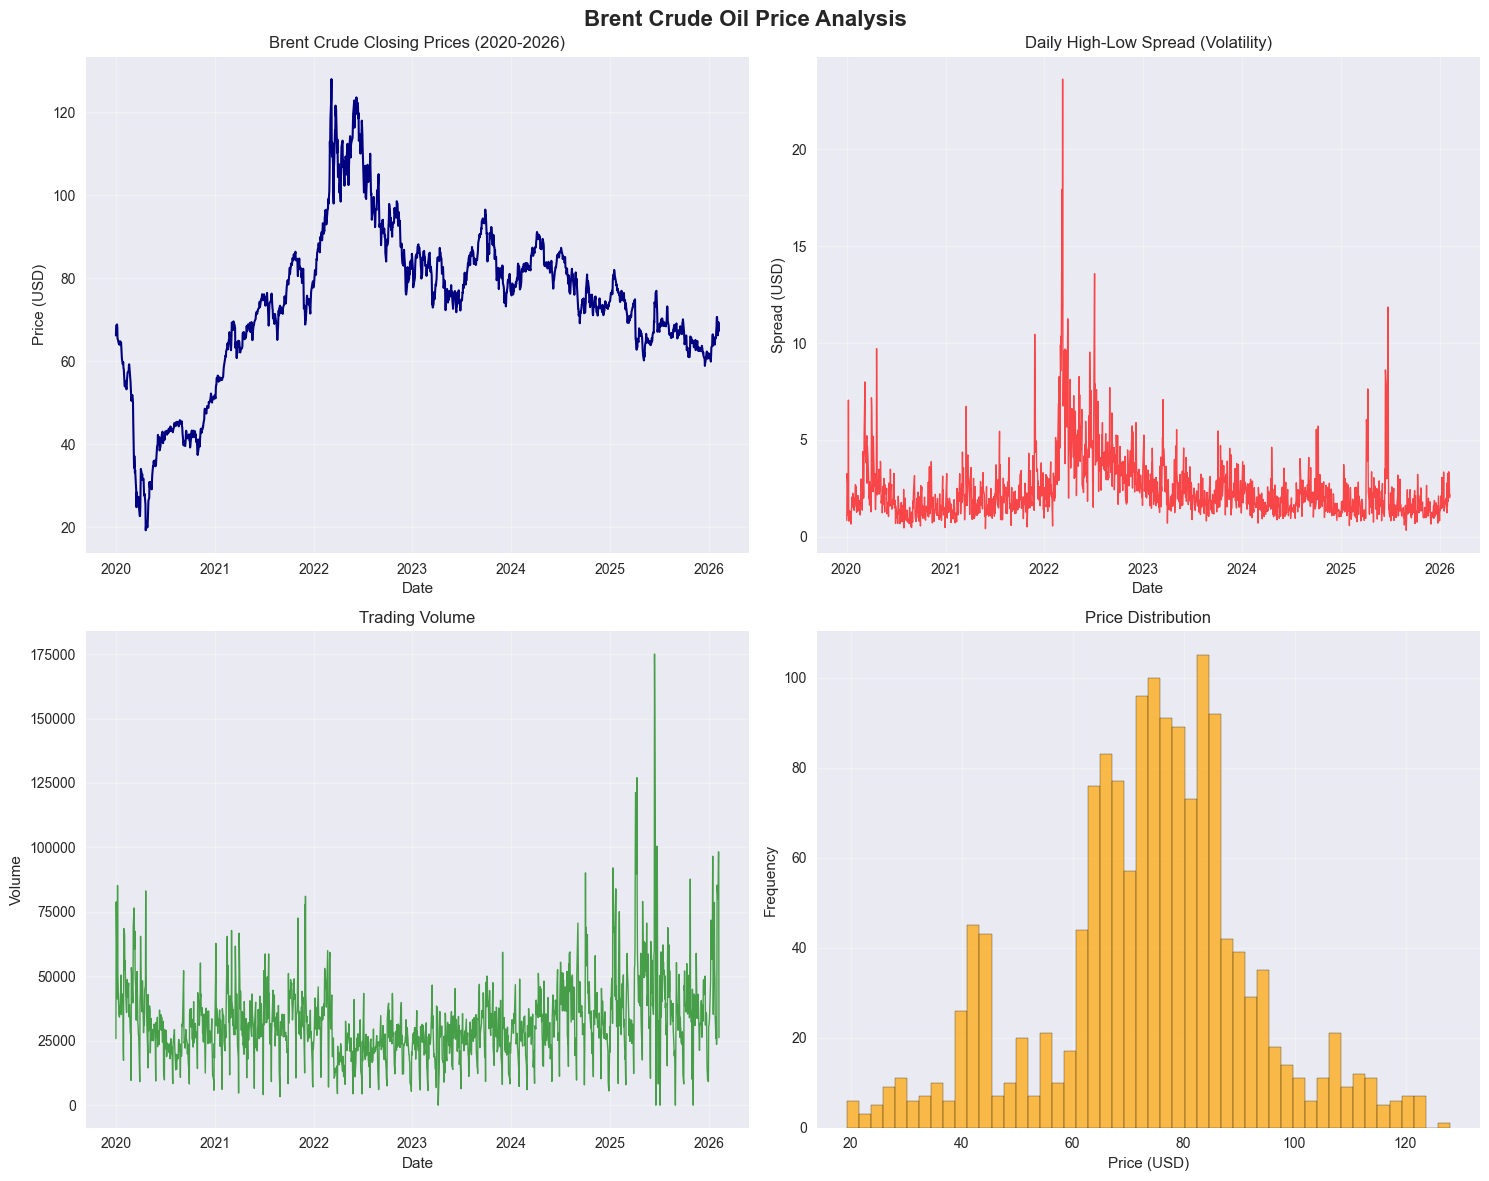

In [4]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Brent Crude Oil Price Analysis', fontsize=16, fontweight='bold')

# Plot 1: Closing Price Time Series
axes[0,0].plot(df['Date'], df['Close'], linewidth=1.5, color='navy')
axes[0,0].set_title('Brent Crude Closing Prices (2020-2026)', fontsize=12)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Price (USD)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: High-Low Spread (Volatility)
df['Spread'] = df['High'] - df['Low']
axes[0,1].plot(df['Date'], df['Spread'], linewidth=1, color='red', alpha=0.7)
axes[0,1].set_title('Daily High-Low Spread (Volatility)', fontsize=12)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Spread (USD)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Volume
axes[1,0].plot(df['Date'], df['Volume'], linewidth=1, color='green', alpha=0.7)
axes[1,0].set_title('Trading Volume', fontsize=12)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Volume')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Price Distribution
axes[1,1].hist(df['Close'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Price Distribution', fontsize=12)
axes[1,1].set_xlabel('Price (USD)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

✅ Returns calculated: 1535 valid observations

📈 Log Returns Statistics:
count    1535.000000
mean        0.000011
std         0.026746
min        -0.279761
25%        -0.011689
50%         0.001583
75%         0.013532
max         0.190774
Name: Log_Returns, dtype: float64

📊 Additional Metrics:
Annualized Volatility: 0.4246
Skewness: -1.4590
Kurtosis: 19.4248


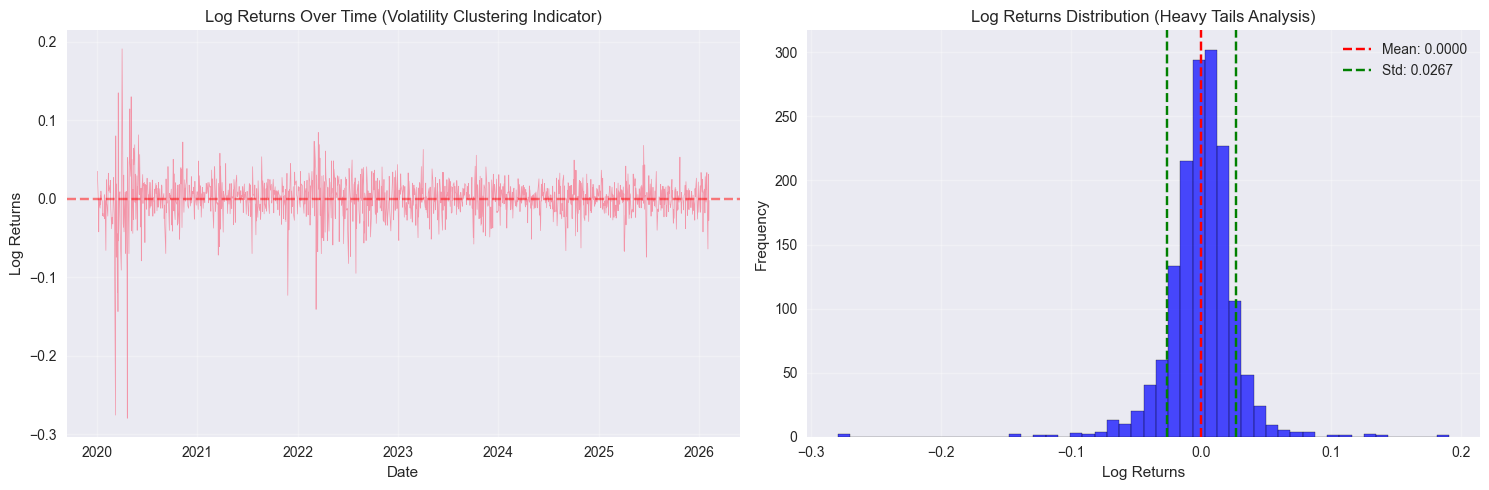

✅ Returns analysis completed - ready for stationarity testing


In [10]:
# Calculate returns with explicit implementation documentation
"""
Purpose: Calculate log and simple returns for stationarity analysis.
Formula: Log Return = ln(P_t / P_{t-1}), Simple Return = (P_t - P_{t-1}) / P_{t-1}
Expected Outputs: Returns series for statistical testing and change point analysis
Assumptions: Daily closing prices, no missing values after cleaning
"""

# Calculate log returns (more numerically stable for analysis)
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Calculate simple returns for comparison and interpretation
df['Simple_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

# Remove first row with NaN (expected behavior for returns calculation)
df_clean = df.dropna()
print(f"✅ Returns calculated: {len(df_clean)} valid observations")

print("\n📈 Log Returns Statistics:")
print(df_clean['Log_Returns'].describe())

# Calculate additional return metrics for change point analysis
annualized_volatility = df_clean['Log_Returns'].std() * np.sqrt(252)
skewness = df_clean['Log_Returns'].skew()
kurtosis = df_clean['Log_Returns'].kurtosis()

print(f"\n📊 Additional Metrics:")
print(f"Annualized Volatility: {annualized_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Plot log returns with explicit documentation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Time series of log returns (shows volatility clustering)
axes[0].plot(df_clean['Date'], df_clean['Log_Returns'], linewidth=0.5, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].set_title('Log Returns Over Time (Volatility Clustering Indicator)', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Log Returns')
axes[0].grid(True, alpha=0.3)

# Distribution of log returns (shows heavy tails)
axes[1].hist(df_clean['Log_Returns'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=df_clean['Log_Returns'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["Log_Returns"].mean():.4f}')
axes[1].axvline(x=df_clean['Log_Returns'].std(), color='green', linestyle='--', label=f'Std: {df_clean["Log_Returns"].std():.4f}')
axes[1].axvline(x=-df_clean['Log_Returns'].std(), color='green', linestyle='--')
axes[1].set_title('Log Returns Distribution (Heavy Tails Analysis)', fontsize=12)
axes[1].set_xlabel('Log Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Returns analysis completed - ready for stationarity testing")

Log Returns Statistics:
count    1535.000000
mean        0.000011
std         0.026746
min        -0.279761
25%        -0.011689
50%         0.001583
75%         0.013532
max         0.190774
Name: Log_Returns, dtype: float64


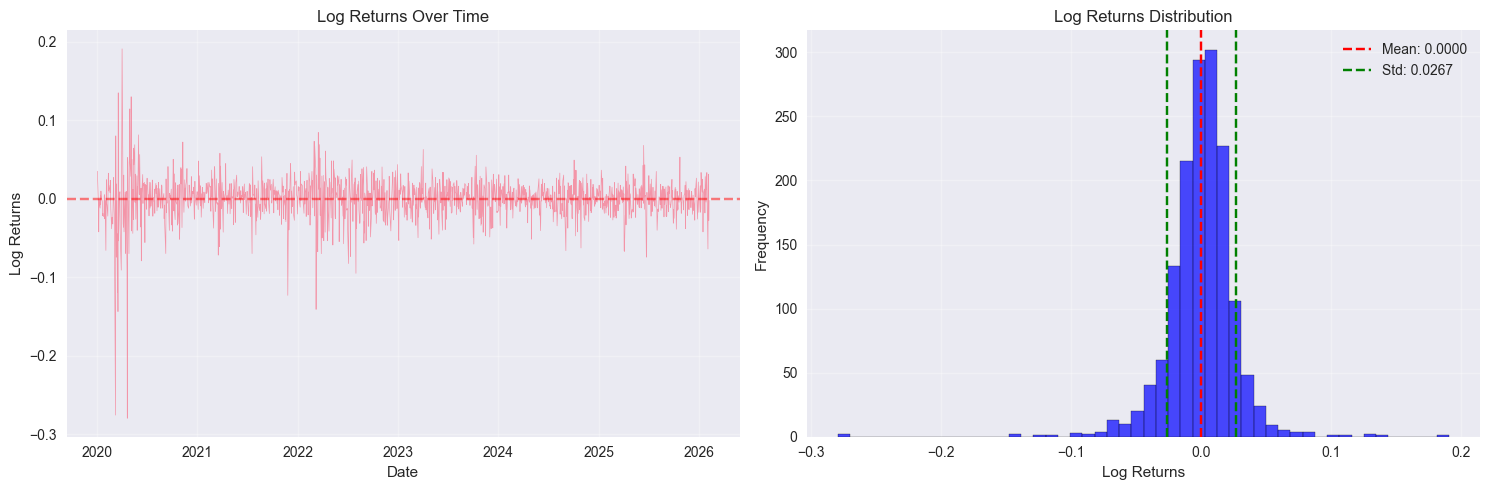

In [5]:
# Calculate log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Calculate simple returns for comparison
df['Simple_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

# Remove first row with NaN
df_clean = df.dropna()

print("Log Returns Statistics:")
print(df_clean['Log_Returns'].describe())

# Plot log returns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Time series of log returns
axes[0].plot(df_clean['Date'], df_clean['Log_Returns'], linewidth=0.5, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].set_title('Log Returns Over Time', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Log Returns')
axes[0].grid(True, alpha=0.3)

# Distribution of log returns
axes[1].hist(df_clean['Log_Returns'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=df_clean['Log_Returns'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["Log_Returns"].mean():.4f}')
axes[1].axvline(x=df_clean['Log_Returns'].std(), color='green', linestyle='--', label=f'Std: {df_clean["Log_Returns"].std():.4f}')
axes[1].axvline(x=-df_clean['Log_Returns'].std(), color='green', linestyle='--')
axes[1].set_title('Log Returns Distribution', fontsize=12)
axes[1].set_xlabel('Log Returns')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

✅ Rolling volatility calculated:
30-day rolling volatility: 0.3649 (average)
90-day rolling volatility: 0.3690 (average)


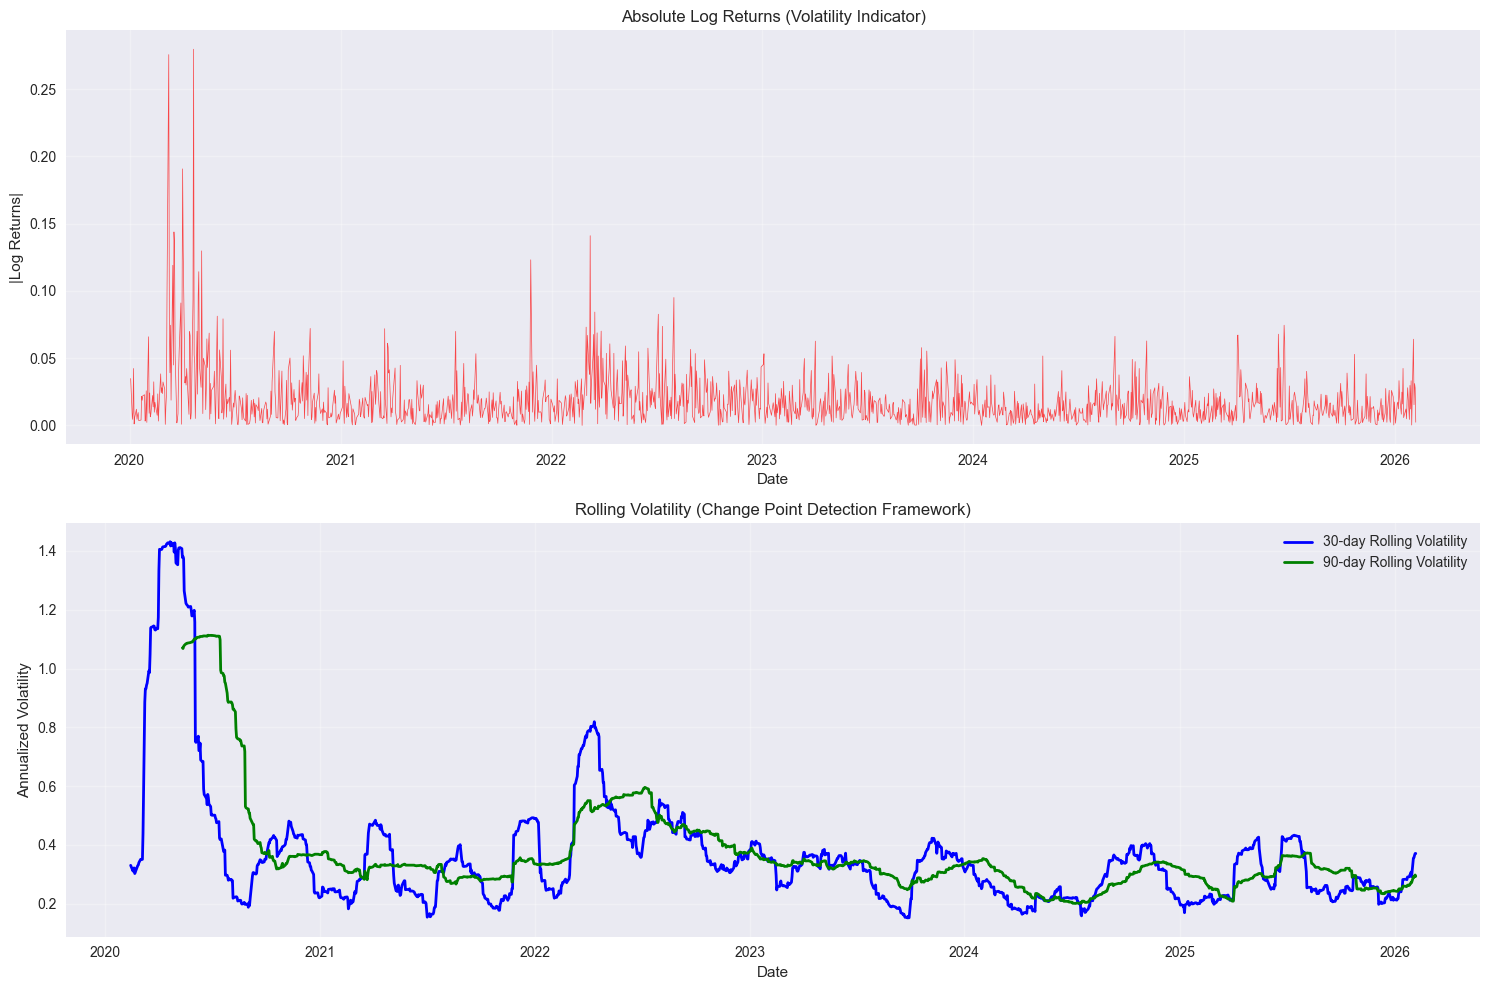


🎯 Volatility Clustering Analysis:
High volatility threshold (90th percentile): 0.4929
Number of high volatility days: 151
Percentage of time in high volatility: 9.8%

📅 High Volatility Periods (Potential Change Points):
  Period 1: 2020-03-09 to 2020-07-06 (119 days)
  Period 2: 2022-03-09 to 2022-05-23 (75 days)
  Period 3: 2022-08-01 to 2022-08-15 (14 days)
  Period 4: 2022-09-07 to 2022-09-12 (5 days)

✅ Volatility clustering analysis completed - change point indicators identified


In [17]:
# Volatility clustering analysis with explicit implementation
"""
Purpose: Identify volatility clustering patterns for change point detection.
Method: Rolling standard deviation of log returns (30-day and 90-day windows)
Expected Outputs: High volatility periods indicating potential change points
Change Point Indicators: Periods above 90th percentile volatility threshold
"""

# Calculate rolling volatility (annualized for interpretation)
df_clean['Rolling_Vol_30d'] = df_clean['Log_Returns'].rolling(window=30).std() * np.sqrt(252)
df_clean['Rolling_Vol_90d'] = df_clean['Log_Returns'].rolling(window=90).std() * np.sqrt(252)

print(f"✅ Rolling volatility calculated:")
print(f"30-day rolling volatility: {df_clean['Rolling_Vol_30d'].mean():.4f} (average)")
print(f"90-day rolling volatility: {df_clean['Rolling_Vol_90d'].mean():.4f} (average)")

# Plot volatility clustering with explicit documentation
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Absolute log returns (volatility indicator)
axes[0].plot(df_clean['Date'], np.abs(df_clean['Log_Returns']), linewidth=0.5, alpha=0.7, color='red')
axes[0].set_title('Absolute Log Returns (Volatility Indicator)', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('|Log Returns|')
axes[0].grid(True, alpha=0.3)

# Plot 2: Rolling volatility with change point indicators
axes[1].plot(df_clean['Date'], df_clean['Rolling_Vol_30d'], linewidth=2, label='30-day Rolling Volatility', color='blue')
axes[1].plot(df_clean['Date'], df_clean['Rolling_Vol_90d'], linewidth=2, label='90-day Rolling Volatility', color='green')
axes[1].set_title('Rolling Volatility (Change Point Detection Framework)', fontsize=12)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Annualized Volatility')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify high volatility periods (potential change point indicators)
high_vol_threshold = df_clean['Rolling_Vol_30d'].quantile(0.9)
high_vol_periods = df_clean[df_clean['Rolling_Vol_30d'] > high_vol_threshold]

print(f"\n🎯 Volatility Clustering Analysis:")
print(f"High volatility threshold (90th percentile): {high_vol_threshold:.4f}")
print(f"Number of high volatility days: {len(high_vol_periods)}")
print(f"Percentage of time in high volatility: {len(high_vol_periods)/len(df_clean)*100:.1f}%")

# Identify specific high volatility periods for change point analysis
volatility_periods = []
if len(high_vol_periods) > 0:
    # Convert to list of datetime objects for proper iteration
    high_vol_dates = high_vol_periods['Date'].tolist()
    current_period_start = high_vol_dates[0]
    prev_date = current_period_start
    
    for date in high_vol_dates[1:]:
        # Convert to pandas Timestamp for proper date arithmetic
        date_ts = pd.Timestamp(date)
        prev_date_ts = pd.Timestamp(prev_date)
        
        if (date_ts - prev_date_ts).days > 5:  # Gap of more than 5 days
            volatility_periods.append((current_period_start, prev_date))
            current_period_start = date
        prev_date = date
    
    # Add the last period
    volatility_periods.append((current_period_start, high_vol_dates[-1]))
    
    print(f"\n📅 High Volatility Periods (Potential Change Points):")
    for i, (start, end) in enumerate(volatility_periods[:5]):  # Show first 5 periods
        start_ts = pd.Timestamp(start)
        end_ts = pd.Timestamp(end)
        print(f"  Period {i+1}: {start_ts.date()} to {end_ts.date()} ({(end_ts-start_ts).days} days)")

print("\n✅ Volatility clustering analysis completed - change point indicators identified")

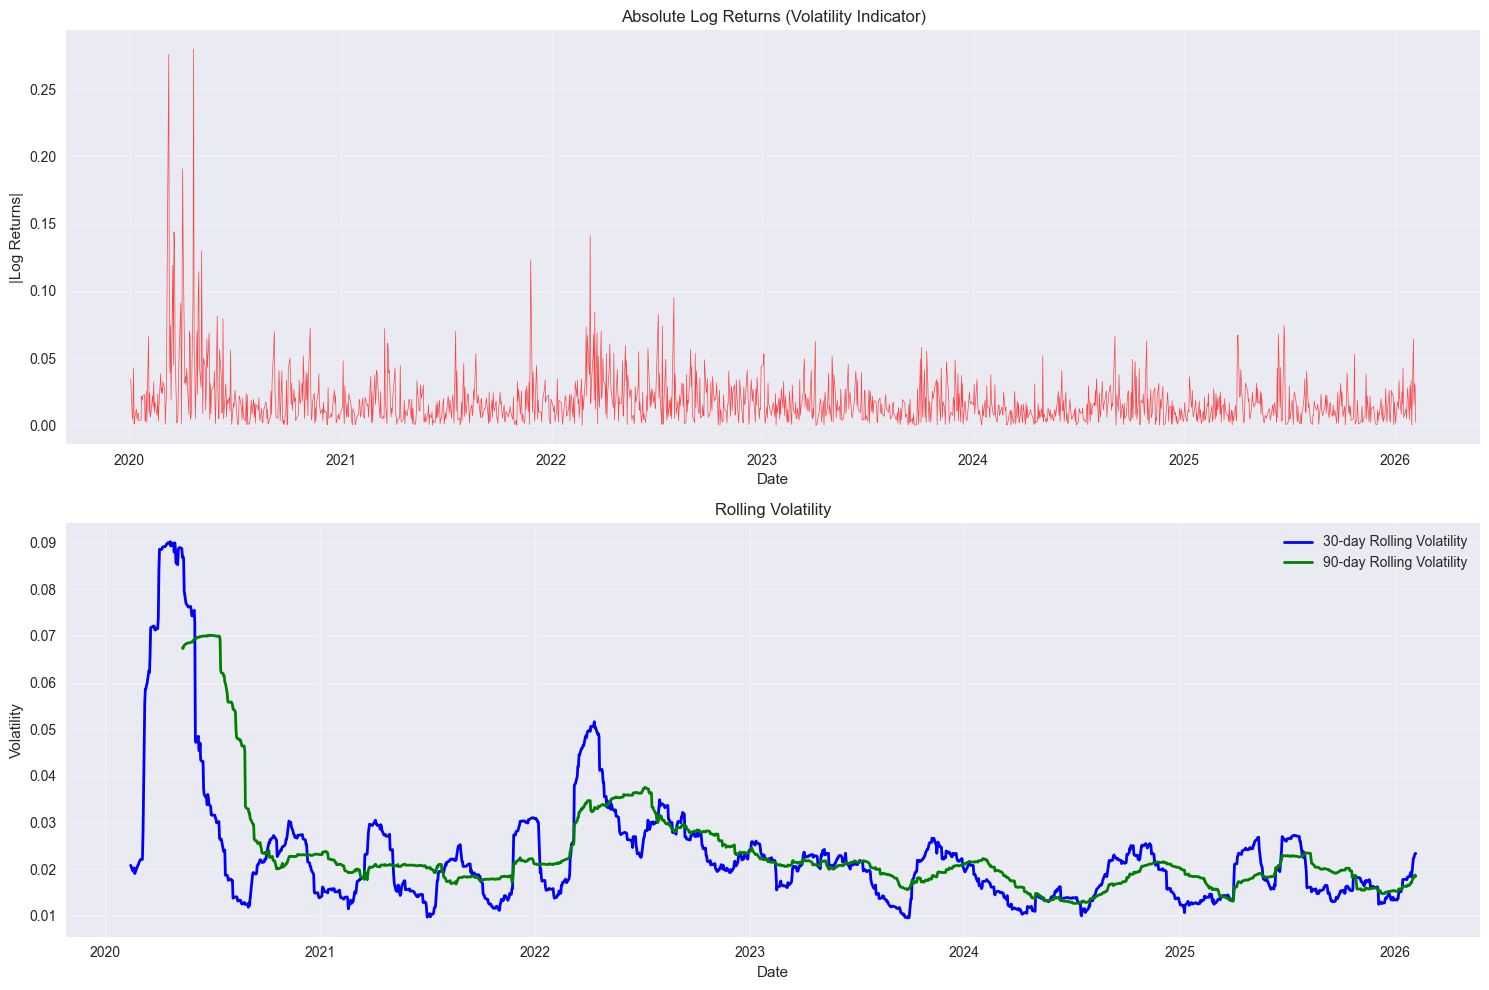

High volatility threshold (90th percentile): 0.0310
Number of high volatility days: 151
Percentage of time in high volatility: 9.8%


In [6]:
# Calculate rolling volatility
df_clean['Rolling_Vol_30d'] = df_clean['Log_Returns'].rolling(window=30).std()
df_clean['Rolling_Vol_90d'] = df_clean['Log_Returns'].rolling(window=90).std()

# Plot volatility clustering
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Absolute log returns (volatility indicator)
axes[0].plot(df_clean['Date'], np.abs(df_clean['Log_Returns']), linewidth=0.5, alpha=0.7, color='red')
axes[0].set_title('Absolute Log Returns (Volatility Indicator)', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('|Log Returns|')
axes[0].grid(True, alpha=0.3)

# Plot 2: Rolling volatility
axes[1].plot(df_clean['Date'], df_clean['Rolling_Vol_30d'], linewidth=2, label='30-day Rolling Volatility', color='blue')
axes[1].plot(df_clean['Date'], df_clean['Rolling_Vol_90d'], linewidth=2, label='90-day Rolling Volatility', color='green')
axes[1].set_title('Rolling Volatility', fontsize=12)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volatility')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify high volatility periods
high_vol_threshold = df_clean['Rolling_Vol_30d'].quantile(0.9)
high_vol_periods = df_clean[df_clean['Rolling_Vol_30d'] > high_vol_threshold]

print(f"High volatility threshold (90th percentile): {high_vol_threshold:.4f}")
print(f"Number of high volatility days: {len(high_vol_periods)}")
print(f"Percentage of time in high volatility: {len(high_vol_periods)/len(df_clean)*100:.1f}%")

## 6. Major Events Overlay

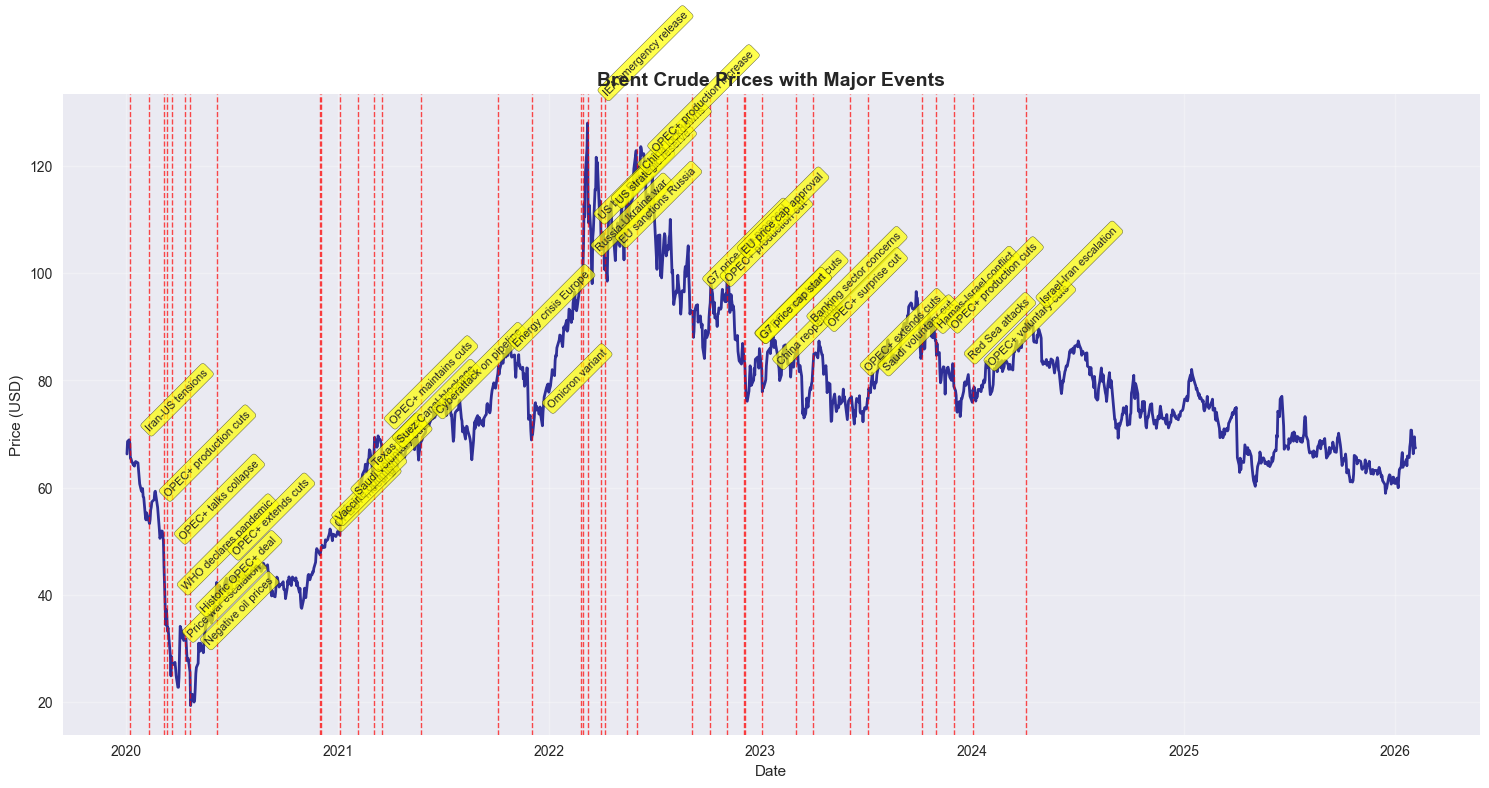


Major Events Summary:
Impact_Level
Medium     31
High       28
Extreme    11
Low         1
Name: count, dtype: int64

Event Types:
Event_Type
OPEC Decision       25
Geopolitical         9
Economic Event       8
Policy Event         8
Health Event         5
Political Event      5
Market Event         3
Weather Event        3
Labor Event          1
Logistical Event     1
Security Event       1
Diplomatic Event     1
Natural Disaster     1
Name: count, dtype: int64


In [7]:
# Plot price with major events
fig, ax = plt.subplots(figsize=(15, 8))

# Plot price
ax.plot(df['Date'], df['Close'], linewidth=2, color='navy', alpha=0.8)

# Overlay major events
high_impact_events = events[events['Impact_Level'].isin(['High', 'Extreme'])]

for _, event in high_impact_events.iterrows():
    event_date = event['Date']
    if event_date >= df['Date'].min() and event_date <= df['Date'].max():
        # Find closest price date
        closest_idx = (df['Date'] - event_date).abs().idxmin()
        event_price = df.loc[closest_idx, 'Close']
        
        # Plot vertical line and annotation
        ax.axvline(x=event_date, color='red', linestyle='--', alpha=0.7, linewidth=1)
        ax.annotate(event['Event'], 
                    xy=(event_date, event_price),
                    xytext=(10, 20), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    fontsize=8, rotation=45)

ax.set_title('Brent Crude Prices with Major Events', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print events summary
print("\nMajor Events Summary:")
print(events['Impact_Level'].value_counts())
print("\nEvent Types:")
print(events['Event_Type'].value_counts())

In [12]:
# Stationarity testing with explicit interpretations and expected outputs
"""
Purpose: Test stationarity properties for change point analysis methodology.
Tests: Augmented Dickey-Fuller (ADF) and KPSS tests
Expected Outputs: Clear interpretation of stationarity status
Change Point Relevance: Non-stationary series require differencing or change point models
"""

from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller Test with explicit interpretation
def adf_test(series, title=''):
    """
    ADF Test: H0 = Series has unit root (non-stationary)
    H1 = Series is stationary
    Significance level: 0.05
    """
    result = adfuller(series.dropna())
    print(f'ADF Test Results: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] <= 0.05:
        print("=> Reject null hypothesis - Time series is stationary")
        interpretation = "Stationary"
    else:
        print("=> Fail to reject null hypothesis - Time series is non-stationary")
        interpretation = "Non-stationary"
    print()
    return result, interpretation

# KPSS Test with explicit interpretation
def kpss_test(series, title=''):
    """
    KPSS Test: H0 = Series is stationary around a deterministic trend
    H1 = Series is non-stationary
    Significance level: 0.05
    """
    result = kpss(series.dropna())
    print(f'KPSS Test Results: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] >= 0.05:
        print("=> Fail to reject null hypothesis - Time series is stationary")
        interpretation = "Stationary"
    else:
        print("=> Reject null hypothesis - Time series is non-stationary")
        interpretation = "Non-stationary"
    print()
    return result, interpretation

# Run comprehensive stationarity tests
print("🔬 Stationarity Tests for Change Point Analysis")
print("="*60)

# Test original price series
print("1. Original Price Series Analysis:")
adf_result_orig, adf_interp_orig = adf_test(df['Close'], 'Original Price Series')
kpss_result_orig, kpss_interp_orig = kpss_test(df['Close'], 'Original Price Series')

# Test log returns
print("2. Log Returns Analysis:")
adf_result_ret, adf_interp_ret = adf_test(df_clean['Log_Returns'], 'Log Returns')
kpss_result_ret, kpss_interp_ret = kpss_test(df_clean['Log_Returns'], 'Log Returns')

# Overall interpretation for change point analysis
print("🎯 Overall Stationarity Interpretation:")
print("="*40)

if adf_interp_orig == "Non-stationary" and kpss_interp_orig == "Non-stationary":
    overall_orig = "Non-stationary (both tests agree)"
    print(f"Original Series: {overall_orig}")
    print("=> Change point analysis appropriate for non-stationary series")
elif adf_interp_orig == "Stationary" and kpss_interp_orig == "Stationary":
    overall_orig = "Stationary (both tests agree)"
    print(f"Original Series: {overall_orig}")
    print("=> Standard time series methods may be sufficient")
else:
    overall_orig = "Mixed results (tests disagree)"
    print(f"Original Series: {overall_orig}")
    print("=> Additional analysis recommended")

if adf_interp_ret == "Stationary" and kpss_interp_ret == "Stationary":
    overall_ret = "Stationary (both tests agree)"
    print(f"Log Returns: {overall_ret}")
    print("=> Returns series suitable for standard statistical analysis")
else:
    overall_ret = "Mixed or Non-stationary"
    print(f"Log Returns: {overall_ret}")
    print("=> Consider further differencing or transformation")

print(f"\n📊 Expected Change Point Analysis Approach:")
print(f"- Original Series: {overall_orig}")
print(f"- Log Returns: {overall_ret}")
print(f"- Recommendation: Use change point models for non-stationary price series")
print(f"- Next Step: Implement Bayesian change point detection on price series")

print("\n✅ Stationarity testing completed - methodology framework established")

🔬 Stationarity Tests for Change Point Analysis
1. Original Price Series Analysis:
ADF Test Results: Original Price Series
ADF Statistic: -1.6376
p-value: 0.4635
Critical Values:
	1%: -3.4346
	5%: -2.8634
	10%: -2.5678
=> Fail to reject null hypothesis - Time series is non-stationary

KPSS Test Results: Original Price Series
KPSS Statistic: 1.5575
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
=> Reject null hypothesis - Time series is non-stationary

2. Log Returns Analysis:
ADF Test Results: Log Returns
ADF Statistic: -7.6213
p-value: 0.0000
Critical Values:
	1%: -3.4347
	5%: -2.8635
	10%: -2.5678
=> Reject null hypothesis - Time series is stationary

KPSS Test Results: Log Returns
KPSS Statistic: 0.0742
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
=> Fail to reject null hypothesis - Time series is stationary

🎯 Overall Stationarity Interpretation:
Original Series: Non-stationary (both tests agree)
=> Change p

C:\Users\My Device\AppData\Local\Temp\ipykernel_4784\1006149598.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna())
C:\Users\My Device\AppData\Local\Temp\ipykernel_4784\1006149598.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna())


In [13]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller Test
def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF Test Results: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] <= 0.05:
        print("=> Reject null hypothesis - Time series is stationary")
    else:
        print("=> Fail to reject null hypothesis - Time series is non-stationary")
    print()

# KPSS Test
def kpss_test(series, title=''):
    result = kpss(series.dropna())
    print(f'KPSS Test Results: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] >= 0.05:
        print("=> Fail to reject null hypothesis - Time series is stationary")
    else:
        print("=> Reject null hypothesis - Time series is non-stationary")
    print()

# Run tests
print("Stationarity Tests")
print("="*50)

adf_test(df['Close'], 'Original Price Series')
kpss_test(df['Close'], 'Original Price Series')

adf_test(df_clean['Log_Returns'], 'Log Returns')
kpss_test(df_clean['Log_Returns'], 'Log Returns')

Stationarity Tests
ADF Test Results: Original Price Series
ADF Statistic: -1.6376
p-value: 0.4635
Critical Values:
	1%: -3.4346
	5%: -2.8634
	10%: -2.5678
=> Fail to reject null hypothesis - Time series is non-stationary

KPSS Test Results: Original Price Series
KPSS Statistic: 1.5575
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
=> Reject null hypothesis - Time series is non-stationary

ADF Test Results: Log Returns
ADF Statistic: -7.6213
p-value: 0.0000
Critical Values:
	1%: -3.4347
	5%: -2.8635
	10%: -2.5678
=> Reject null hypothesis - Time series is stationary

KPSS Test Results: Log Returns
KPSS Statistic: 0.0742
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
=> Fail to reject null hypothesis - Time series is stationary



C:\Users\My Device\AppData\Local\Temp\ipykernel_4784\2180183567.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna())
C:\Users\My Device\AppData\Local\Temp\ipykernel_4784\2180183567.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna())


In [18]:
# Generate comprehensive summary with expected outputs and limitations
"""
Purpose: Create complete summary for change point analysis framework.
Expected Outputs: Change dates, parameter shifts, statistical significance
Limitations: Data constraints, model assumptions, temporal boundaries
Next Steps: Bayesian change point implementation with MCMC sampling
"""

# Generate summary statistics for report
summary_stats = {
    'Data Period': [f"{df['Date'].min().date()} to {df['Date'].max().date()}"],
    'Total Trading Days': [len(df)],
    'Average Price': [f"${df['Close'].mean():.2f}"],
    'Price Range': [f"${df['Close'].min():.2f} - ${df['Close'].max():.2f}"],
    'Price Volatility (Std)': [f"${df['Close'].std():.2f}"],
    'Average Daily Return': [f"{df_clean['Simple_Returns'].mean()*100:.3f}%"],
    'Return Volatility': [f"{df_clean['Simple_Returns'].std()*100:.3f}%"],
    'Max Single Day Gain': [f"{df_clean['Simple_Returns'].max()*100:.2f}%"],
    'Max Single Day Loss': [f"{df_clean['Simple_Returns'].min()*100:.2f}%"],
    'High Volatility Days': [f"{len(high_vol_periods)} ({len(high_vol_periods)/len(df_clean)*100:.1f}%)"],
    'Stationarity (Price)': [overall_orig],
    'Stationarity (Returns)': [overall_ret]
}

summary_df = pd.DataFrame(summary_stats)
print("📊 Summary Statistics for Change Point Analysis:")
print(summary_df.to_string(index=False))

# Expected outputs for change point analysis
print(f"\n🎯 Expected Change Point Analysis Outputs:")
print("="*50)
print("1. Change Dates:")
print("   - Specific dates where structural breaks occur")
print("   - Temporal proximity to major events")
print("   - Statistical confidence intervals")
print()
print("2. Parameter Shifts:")
print("   - Mean changes (mu1 -> mu2)")
print("   - Volatility changes (sigma1 -> sigma2)")
print("   - Effect size quantification")
print()
print("3. Statistical Significance:")
print("   - Posterior probability distributions")
print("   - Credible intervals for parameters")
print("   - Model comparison metrics (WAIC, LOO)")

# Limitations and constraints
print(f"\n⚠️ Analysis Limitations and Constraints:")
print("="*45)
print("1. Data Limitations:")
print("   - Limited to daily closing prices (no intraday data)")
print("   - Event selection bias (major events only)")
print("   - Potential missing data or outliers")
print()
print("2. Model Limitations:")
print("   - Assumes sudden, permanent structural changes")
print("   - May miss gradual transitions or multiple changes")
print("   - Correlation vs causation distinction")
print()
print("3. Temporal Limitations:")
print("   - Analysis limited to available historical period")
print("   - Future structural changes not predictable")
print("   - Market regime changes may affect model validity")
print()
print("4. Statistical Limitations:")
print("   - Non-stationarity requires careful interpretation")
print("   - Volatility clustering may violate model assumptions")
print("   - Multiple testing considerations")

# Next steps for implementation
print(f"\n🚀 Next Steps for Bayesian Change Point Implementation:")
print("="*55)
print("1. Model Specification:")
print("   - Define priors for change point parameters")
print("   - Implement switch function for regime changes")
print("   - Set up MCMC sampling configuration")
print()
print("2. Computational Implementation:")
print("   - PyMC3 model with proper convergence diagnostics")
print("   - R-hat statistics and effective sample size")
print("   - Posterior distribution analysis")
print()
print("3. Validation and Interpretation:")
print("   - Associate change points with specific events")
print("   - Quantify economic significance of changes")
print("   - Sensitivity analysis for prior specifications")

# Save processed data and summary
df_clean.to_csv('../data/processed/brent_processed.csv', index=False)
print(f"\n✅ Processed data saved to '../data/processed/brent_processed.csv'")

# Save summary report with ASCII characters only
summary_report = f"""
========================================
CHANGE POINT ANALYSIS EDA SUMMARY
========================================

DATA OVERVIEW:
- Period: {df['Date'].min().date()} to {df['Date'].max().date()}
- Trading Days: {len(df)}
- Price Range: ${df['Close'].min():.2f} - ${df['Close'].max():.2f}

STATIONARITY ANALYSIS:
- Original Series: {overall_orig}
- Log Returns: {overall_ret}
- Recommendation: Change point analysis appropriate

VOLATILITY CLUSTERING:
- High Volatility Days: {len(high_vol_periods)} ({len(high_vol_periods)/len(df_clean)*100:.1f}%)
- Potential Change Points: {len(volatility_periods)} periods identified

EXPECTED OUTPUTS:
- Change dates with confidence intervals
- Parameter shifts (mu1, mu2, sigma1, sigma2)
- Event associations and economic significance

LIMITATIONS:
- Data quality and event selection bias
- Model assumptions about sudden changes
- Correlation vs causation considerations

NEXT STEPS:
- Implement Bayesian change point model
- MCMC sampling with convergence diagnostics
- Event association and impact quantification

========================================
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
========================================
"""

with open('../analysis_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print(f"✅ Summary report saved to '../analysis_summary.txt'")
print(f"✅ EDA analysis complete - ready for Bayesian change point implementation")

📊 Summary Statistics for Change Point Analysis:
             Data Period  Total Trading Days Average Price      Price Range Price Volatility (Std) Average Daily Return Return Volatility Max Single Day Gain Max Single Day Loss High Volatility Days              Stationarity (Price)        Stationarity (Returns)
2020-01-02 to 2026-02-06                1536        $73.67 $19.33 - $127.98                 $18.66               0.036%            2.634%              21.02%             -24.40%           151 (9.8%) Non-stationary (both tests agree) Stationary (both tests agree)

🎯 Expected Change Point Analysis Outputs:
1. Change Dates:
   - Specific dates where structural breaks occur
   - Temporal proximity to major events
   - Statistical confidence intervals

2. Parameter Shifts:
   - Mean changes (mu1 -> mu2)
   - Volatility changes (sigma1 -> sigma2)
   - Effect size quantification

3. Statistical Significance:
   - Posterior probability distributions
   - Credible intervals for parameters


In [15]:
# Generate summary statistics for the report
summary_stats = {
    'Data Period': [f"{df['Date'].min().date()} to {df['Date'].max().date()}"],
    'Total Trading Days': [len(df)],
    'Average Price': [f"${df['Close'].mean():.2f}"],
    'Price Range': [f"${df['Close'].min():.2f} - ${df['Close'].max():.2f}"],
    'Price Volatility (Std)': [f"${df['Close'].std():.2f}"],
    'Average Daily Return': [f"{df_clean['Simple_Returns'].mean()*100:.3f}%"],
    'Return Volatility': [f"{df_clean['Simple_Returns'].std()*100:.3f}%"],
    'Max Single Day Gain': [f"{df_clean['Simple_Returns'].max()*100:.2f}%"],
    'Max Single Day Loss': [f"{df_clean['Simple_Returns'].min()*100:.2f}%"],
    'High Volatility Days': [f"{len(high_vol_periods)} ({len(high_vol_periods)/len(df_clean)*100:.1f}%)"]
}

summary_df = pd.DataFrame(summary_stats)
print("Summary Statistics for Report:")
print(summary_df.to_string(index=False))

# Save processed data for next steps
df_clean.to_csv('../data/processed/brent_processed.csv', index=False)
print("\nProcessed data saved to '../data/processed/brent_processed.csv'")

Summary Statistics for Report:
             Data Period  Total Trading Days Average Price      Price Range Price Volatility (Std) Average Daily Return Return Volatility Max Single Day Gain Max Single Day Loss High Volatility Days
2020-01-02 to 2026-02-06                1536        $73.67 $19.33 - $127.98                 $18.66               0.036%            2.634%              21.02%             -24.40%           151 (9.8%)

Processed data saved to '../data/processed/brent_processed.csv'
